In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
MILdf = gdf[gdf.Tm == 'MIL']
WASdf = gdf[gdf.Tm == 'WAS']


In [5]:
MILdf.Date = MILdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
MILdf = MILdf[(MILdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (MILdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

WASdf.Date = WASdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
WASdf = WASdf[(WASdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (WASdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

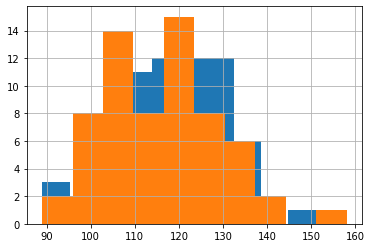

In [6]:
MILdf.TeamPTS.hist()
WASdf.TeamPTS.hist()

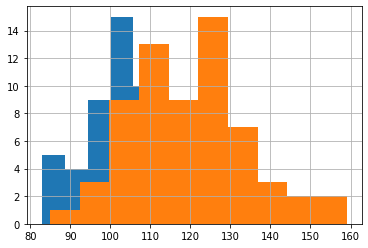

In [7]:
MILdf.OpponentPTS.hist()
WASdf.OpponentPTS.hist()

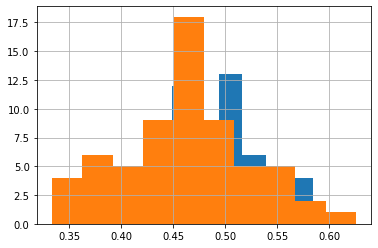

In [8]:
MILdf.TeamFGP.hist()
WASdf.TeamFGP.hist()

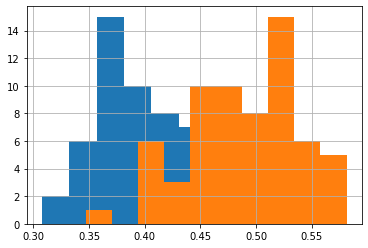

In [9]:
MILdf.OpponentFGP.hist()
WASdf.OpponentFGP.hist()

In [10]:
MILmeanpts = MILdf.TeamPTS.mean()
WASmeanpts = WASdf.TeamPTS.mean()
MILfgp = MILdf.TeamFGP.mean()
WASfgp = WASdf.TeamFGP.mean()
MILsdpts = MILdf.TeamPTS.std()
WASsdpts = WASdf.TeamPTS.std()

MILmeaWASp = MILdf.OpponentPTS.mean()
WASmeaWASp = WASdf.OpponentPTS.mean()
MILfgpopp = MILdf.OpponentFGP.mean()
WASfgpopp = WASdf.OpponentFGP.mean()
MILsdopp = MILdf.OpponentPTS.std()
WASsdopp = WASdf.OpponentPTS.std()

print("MIL Mean ", MILmeanpts)
print("MIL FG% ", MILfgp)
print("MIL Points Standard Deviation ", MILsdpts)
print("WAS Points Mean ", WASmeanpts)
print("WAS FG% ", WASfgp)
print("WAS Points Standard Deviation ", WASsdpts)

print("MIL OppPoints Mean ", MILmeaWASp)
print("MIL OppFG% Mean ", MILfgpopp)
print("MIL OppPoints SD ", MILsdopp)
print("WAS OppPoints Mean ", WASmeaWASp)
print("WAS OppFG% Mean ", WASfgpopp)
print("WAS OppPoints SD ", WASsdopp)

MIL Mean  118.64615384615385
MIL FG%  0.4783692307692308
MIL Points Standard Deviation  11.782442935930627
WAS Points Mean  115.609375
WAS FG%  0.46209375000000014
WAS Points Standard Deviation  13.180814806689835
MIL OppPoints Mean  107.35384615384615
MIL OppFG% Mean  0.41407692307692295
MIL OppPoints SD  13.054490091093623
WAS OppPoints Mean  119.65625
WAS OppFG% Mean  0.49009375
WAS OppPoints SD  14.488330005532259


In [11]:
def gameSim():
    MILScore = (rnd.gauss(MILmeanpts,MILsdpts)+ rnd.gauss(WASmeaWASp,WASsdopp))/2
    WASScore = (rnd.gauss(WASmeanpts,WASsdpts)+ rnd.gauss(WASmeaWASp,WASsdopp))/2
    if int(round(MILScore)) > int(round(WASScore)):
        return 1
    elif int(round(MILScore)) < int(round(WASScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('MIL Win ', team1win/(team1win+team2win),'%')
    print('WAS Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

MIL Win  0.5509783728115345 %
WAS Win  0.4490216271884655 %


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
